In [1]:
#importa bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt


Leitura da base de dados e visualização

In [2]:
data = pd.read_csv("music_genre.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

Limpeza da base de dados

In [4]:
df=data[['artist_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence','music_genre']]
df.describe()
print(df.isnull().sum())

artist_name         5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64


In [5]:
df=df.dropna(axis=0)
print(df.isnull().sum())

artist_name         0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64


Análise exploratória

In [6]:
df['music_genre'].value_counts()

Country        5000
Rock           5000
Classical      5000
Blues          5000
Alternative    5000
Electronic     5000
Jazz           5000
Anime          5000
Rap            5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [7]:
df['artist_name'].value_counts(True)*100

empty_field                4.978
Nobuo Uematsu              0.858
Wolfgang Amadeus Mozart    0.804
Ludwig van Beethoven       0.634
Johann Sebastian Bach      0.628
                           ...  
Blind Boy Fuller           0.002
Ricardo Arjona             0.002
Nigga                      0.002
Starland Vocal Band        0.002
Raphaella                  0.002
Name: artist_name, Length: 6863, dtype: float64

In [8]:
df['artist_name'].value_counts()

empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Blind Boy Fuller              1
Ricardo Arjona                1
Nigga                         1
Starland Vocal Band           1
Raphaella                     1
Name: artist_name, Length: 6863, dtype: int64

In [9]:
pd.crosstab(df['artist_name'],df['music_genre'])

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
artist_name,,,,,,,,,,
!!!,1,0,0,0,0,21,0,0,0,0
"""Weird Al"" Yankovic",0,0,0,0,0,0,0,0,0,1
$NOT,0,0,0,0,0,0,3,0,0,0
$tupid Young,0,0,0,0,0,0,0,0,1,0
$uicideBoy$,0,0,0,0,0,0,51,0,41,0
...,...,...,...,...,...,...,...,...,...,...
棗坂シキ(CV.平川大輔),0,1,0,0,0,0,0,0,0,0
楚神ウリエ(CV.近藤隆),0,2,0,0,0,0,0,0,0,0
立華リツカ(CV.茜屋日海夏),0,1,0,0,0,0,0,0,0,0


In [10]:
dic={"Alternative":0,"Anime":1,"Blues":2,"Classical":3,"Country":4,"Electronic":5,"Hip-Hop":6,"Jazz":7,"Rap":8,"Rock":9}
df['music_genre']=df['music_genre'].map(dic)

In [11]:
df['Hip-Hop']=0
df.loc[df['music_genre']==6,"Hip-Hop"]=1

In [12]:
import seaborn as sns

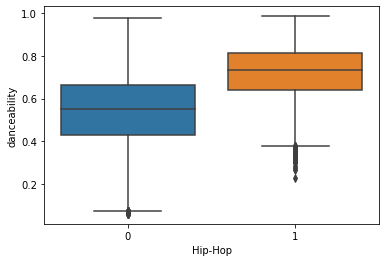

In [29]:
sns.boxplot(x=df['Hip-Hop'],y=df['danceability']);

In [14]:
df.dtypes

artist_name          object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre           int64
Hip-Hop               int64
dtype: object

In [15]:
df['music_genre'].value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
Name: music_genre, dtype: int64

In [25]:
lista_parametros=['popularity','acousticness', 'danceability','duration_ms', 'energy','instrumentalness', 'liveness','loudness','speechiness', 'valence']
X=df[lista_parametros]
Y=df['Hip-Hop']
X.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
dtype: object

In [26]:
def regress(Y,X):

#     X_cp = sm.add_constant(X)
    model = sm.Logit(Y,X)
    results = model.fit()
    
    return results

In [27]:
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.226645
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Hip-Hop   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49990
Method:                           MLE   Df Model:                            9
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3028
Time:                        15:32:40   Log-Likelihood:                -11332.
converged:                       True   LL-Null:                       -16254.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           0.0373      0.001     27.277      0.000       0.035       0.040
acousticness        -1.4416      0.088    -16.337      0.000      -1.615      -1.269
danceability         2.6635      0.115     23.233      0.000       2.439       2.888
duration_ms      -1.325e-06   1.89e-07     -7.003      0.000    -1.7e-06   -9.54e-07
energy              -5.3308      0.102    -52.022      0.000      -5.532      -5.130
instrumentalness    -3.3843      0.231    -14.674      0.000      -3.836      -2.932
liveness             0.2460      0.116      2.129      0.033       0.020       0.472
loudness             0.2897      0.007     39.143      0.000       0.275       0.304
speechiness          6.0184      0.132     45.513      0.000       5.759       6.278
valence             -0.6499      0.085     -7.619      0.000      -0.817      -0.483
====================================================================================
"""